<a href="https://colab.research.google.com/github/kmayutrisna/IMDB_CNN_biLSTM/blob/main/IMDB_CNN_Base1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#DATA PREPARATION
# Importing essential libraries and functions

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf

from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
#Get the dataset from gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data =pd.read_csv("drive/My Drive/data/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.review.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
# Checking for missing values

data.isnull().values.any()

False

<Axes: xlabel='sentiment', ylabel='count'>

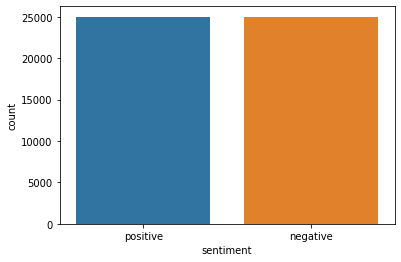

In [7]:
# Let's observe distribution of positive / negative sentiments in dataset

import seaborn as sns
sns.countplot(x='sentiment', data=data)

**DATA PREPROCESSING**

In [8]:
data["review"][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [9]:
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
  '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''
  return TAG_RE.sub('', text)

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
def preprocess_text(sen):
     '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
     in lowercase'''
    
     sentence = sen.lower()

      #Remove html tags
     sentence = remove_tags(sentence)

      #Remove punctuations and numbers
     sentence = re.sub('[^a-zA-Z]', ' ', sentence)

      #Single character removal
     sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

      #Remove multiple spaces
     sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

     # Remove Stopwords
     pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
     sentence = pattern.sub('', sentence)

     return sentence

In [16]:
# Calling preprocessing_text function on movie_reviews

#X = []
#sentences = list(data['review'])
#for sen in sentences:
 #   X.append(preprocess_text(sen))

#Display datas that has been cleaned
data['processed'] = data['review'].apply(lambda x: preprocess_text(sen))
data.head()

,review,sentiment,processed
0,One of the other reviewers has mentioned that ...,positive,one expects star trek movies high art fans exp...
1,A wonderful little production. <br /><br />The...,positive,one expects star trek movies high art fans exp...
2,I thought this was a wonderful way to spend ti...,positive,one expects star trek movies high art fans exp...
3,Basically there's a family where a little boy ...,negative,one expects star trek movies high art fans exp...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,one expects star trek movies high art fans exp...


In [13]:
# Sample cleaned up movie review 

X[2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends '

In [15]:
X.head()

AttributeError: ignored

In [46]:
# Converting sentiment labels to 0 & 1

y = data['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models 
# while test set will be used to evaluate how well our model performs 

**One Hot**

In [48]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size = 10000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]

In [49]:
X_train[2]

[6229,
 3891,
 3886,
 9184,
 4965,
 3891,
 6540,
 5339,
 7861,
 2579,
 4601,
 79,
 7138,
 3498,
 7792,
 3886,
 4439,
 2831,
 5360,
 6278,
 5001,
 7947,
 147,
 9277,
 1317,
 1501,
 8300,
 8540,
 4829,
 3886,
 6319,
 8329,
 3122,
 5963,
 9132,
 5422,
 523,
 8241,
 3960,
 1267,
 9602,
 2922,
 3886]

**PAD THE SEQUENCE**

In [51]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 500
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

**1-D Convolutions over text**

In [53]:
from tensorflow.keras.layers import Dense, Embedding,GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding

cnn_model = Sequential()

cnn_model.add(Embedding(vocab_size, 64, input_length = max_length))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [54]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 64)           640000    
                                                                 
 conv1d_2 (Conv1D)           (None, 496, 128)          41088     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 681,217
Trainable params: 681,217
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1250/1250 [==============================] - 186s 148ms/step - loss: 0.3865 - acc: 0.8228 - val_loss: 0.3021 - val_acc: 0.8736
Epoch 2/20
1250/1250 [==============================] - 183s 146ms/step - loss: 0.2254 - acc: 0.9108 - val_loss: 0.2931 - val_acc: 0.8772
Epoch 3/20
1250/1250 [==============================] - 185s 148ms/step - loss: 0.1143 - acc: 0.9619 - val_loss: 0.3373 - val_acc: 0.8724
Epoch 4/20
1250/1250 [==============================] - 188s 150ms/step - loss: 0.0390 - acc: 0.9908 - val_loss: 0.4056 - val_acc: 0.8733
Epoch 5/20
1250/1250 [==============================] - 185s 148ms/step - loss: 0.0088 - acc: 0.9993 - val_loss: 0.4857 - val_acc: 0.8740
Epoch 6/20
1250/1250 [==============================] - 184s 147ms/step - loss: 0.0023 - acc: 0.9999 - val_loss: 0.5505 - val_acc: 0.8762
Epoch 7/20
1250/1250 [==============================] - 185s 148ms/step - loss: 5.3348e-04 - acc: 1.0000 - val_loss: 0.6021 - val_acc: 0.8758
Epoch 8/20
1250/1250 [========

In [25]:
loss, accuracy = cnn_model.evaluate(X_test,y_test)
print('Testing Accuracy is {} '.format(accuracy*100))

313/313 [==============================] - 3s 9ms/step - loss: 1.4253 - acc: 0.8220
Testing Accuracy is 82.20000267028809 


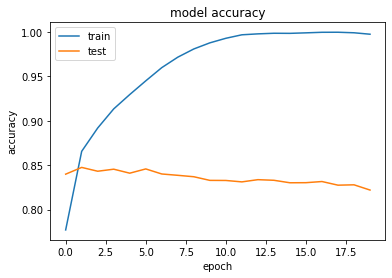

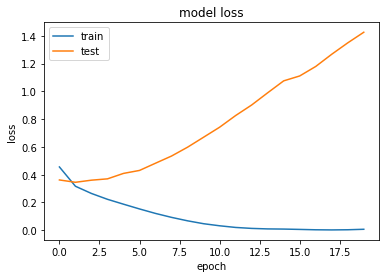

In [26]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

313/313 [==============================] - 3s 10ms/step


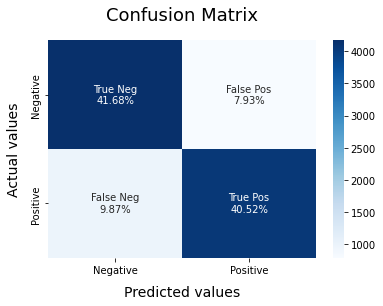

In [29]:
# Predicting on the Test dataset.
y_pred = cnn_model.predict(X_test)

# Converting prediction to reflect the sentiment predicted.
y_pred = np.where(y_pred>=0.5, 1, 0)

# Printing out the Evaluation metrics. 
ConfusionMatrix(y_pred, y_test)

In [31]:
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8085    0.8402    0.8240      4961
           1     0.8363    0.8041    0.8199      5039

    accuracy                         0.8220     10000
   macro avg     0.8224    0.8221    0.8220     10000
weighted avg     0.8225    0.8220    0.8220     10000

